# **Foreign Currency Exchage Rate**
### **Abu Bakar**(190311002)
### Supervised by  M. M. Musharaf Hussain and Mahamudul Hasan Moon
#### School of Science & Engineering, Department of Computer Science & Engineering


---


## University of Creative Technology Chittagong
Chandgaon Police Station, 1084,Shah Amanat Bridge Connecting Road,Chattagram, Bangladesh







In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , accuracy_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
# import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr
import missingno as missno
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split


# Load The Dataset



In [80]:
My__Data = pd.read_csv(r"/content/sample_data/Foreign__Currency__Exchage___Rate.csv") #read data as csv file


In [81]:
My__Data

,Unnamed: 0,Sell,Buying,Currency,Date
0,0,22.7413,22.6610,JPY,2/23/2023
1,1,22.7683,22.6873,JPY,2/22/2023
2,2,22.7689,22.6852,JPY,2/21/2023
3,3,22.8478,22.7717,JPY,2/20/2023
4,4,22.8278,22.7504,JPY,2/19/2023
...,...,...,...,...,...
13823,13823,18.0122,17.8647,euro,1/2/2020
13824,13824,NaN,NaN,NaN,NaN
13825,13825,18.1548,NaN,euro,NaN
13826,13826,18.2568,NaN,NaN,NaN


In [82]:
shape = My__Data.shape
print(f"the dataset contain of << {shape[0]} >> row and << {shape[1]} >> main columns")
name_col = My__Data.columns
print("=*" * 20)
print(f"the columns of this data is {name_col}")
print("=*" * 20)


the dataset contain of << 13828 >> row and << 5 >> main columns
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
the columns of this data is Index(['Unnamed: 0', 'Sell', 'Buying', 'Currency', 'Date'], dtype='object')
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


In [ ]:
My__Data.describe()         # Describe the numerical data


,Unnamed: 0,Sell,Buying
count,13828.000000,13827.000000,13825.000000
mean,6913.500000,17.666785,17.529348
std,3991.944096,17.019907,16.898040
min,0.000000,1.345900,1.334400
25%,3456.750000,4.222500,4.186300
50%,6913.500000,14.347800,14.233300
75%,10370.250000,22.256700,22.020300
max,13827.000000,100.125600,99.761900


In [83]:
My__Data.head()

,Unnamed: 0,Sell,Buying,Currency,Date
0,0,22.7413,22.6610,JPY,2/23/2023
1,1,22.7683,22.6873,JPY,2/22/2023
2,2,22.7689,22.6852,JPY,2/21/2023
3,3,22.8478,22.7717,JPY,2/20/2023
4,4,22.8278,22.7504,JPY,2/19/2023


In [84]:
My__Data.info()  # We have missing data , we will handle them as we go


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13828 non-null  int64  
 1   Sell        13827 non-null  float64
 2   Buying      13825 non-null  float64
 3   Currency    13826 non-null  object 
 4   Date        13824 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 540.3+ KB


In [85]:
My__Data.describe(include='O')


,Currency,Date
count,13826,13824
unique,18,768
top,euro,2/23/2023
freq,770,18


In [86]:
My__Data.drop('Unnamed: 0', axis=1, inplace=True)
My__Data.head(2)

,Sell,Buying,Currency,Date
0,22.7413,22.6610,JPY,2/23/2023
1,22.7683,22.6873,JPY,2/22/2023


# missing value handling

In [87]:
check_missing = My__Data.isnull().sum()


In [88]:
miss_val = check_missing[check_missing > 0]
miss_val


Sell        1
Buying      3
Currency    2
Date        4
dtype: int64

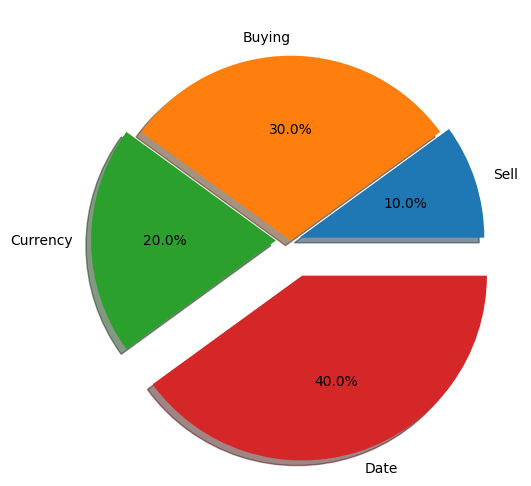

In [89]:
plt.figure(figsize=(10 , 6))
plt.pie(miss_val ,labels=My__Data.columns[check_missing>0] , shadow=True , autopct="%1.1f%%" ,
        explode = [0.05 , 0.0 , 0.08 , 0.2] )
plt.show()


<Axes: >

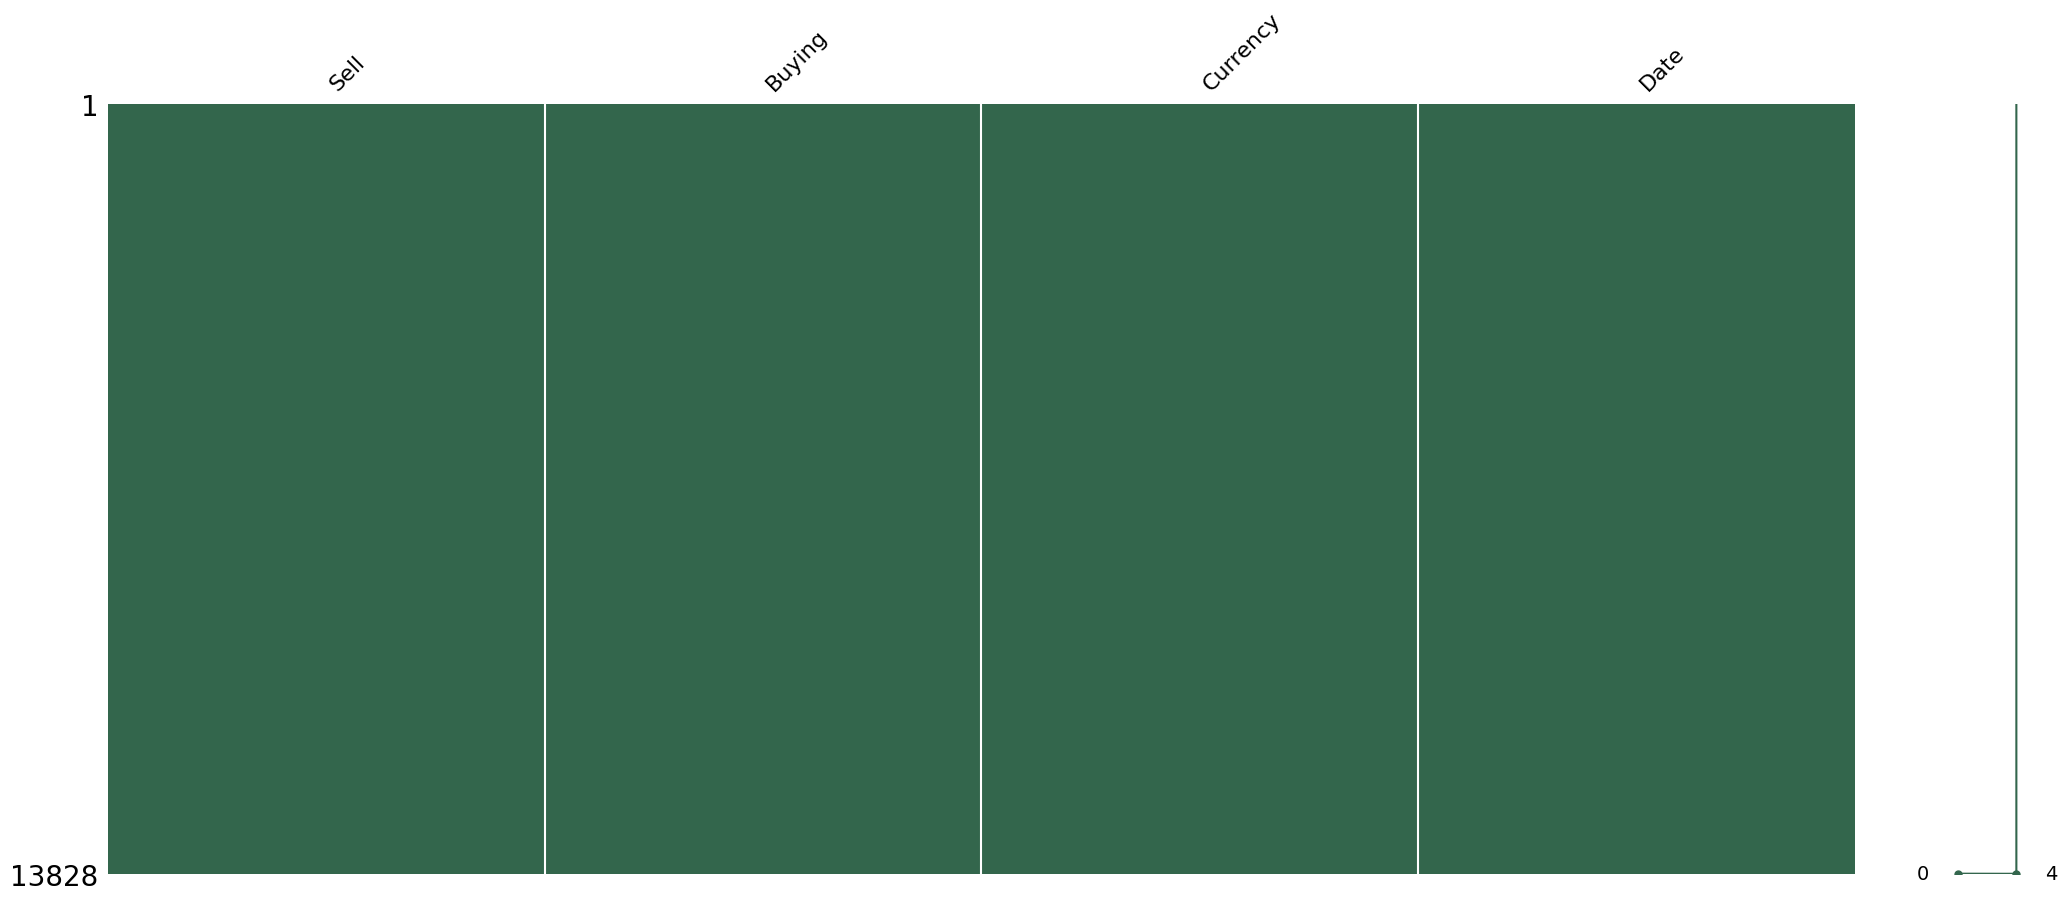

In [90]:
# It provides a color fill for each column. When data is present,
# the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.

missno.matrix(My__Data , color=(0.2, 0.4, 0.3))


<Axes: >

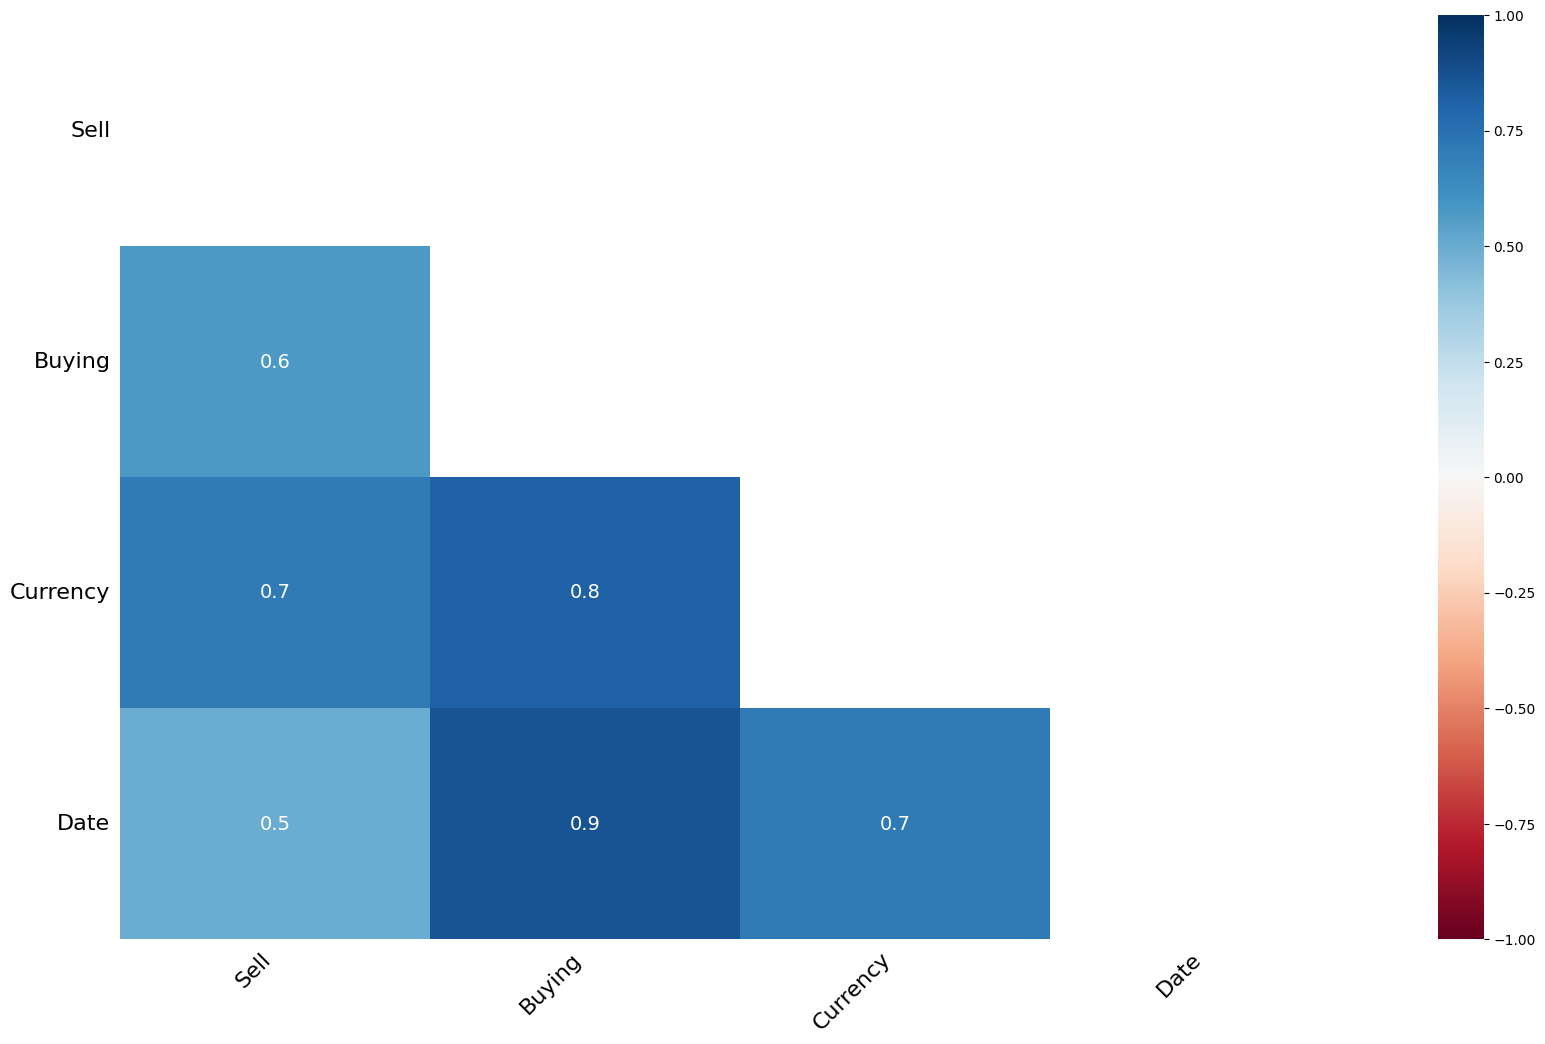

In [91]:
#identify correlations of the nullity between each of the different columns.
#In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

missno.heatmap(My__Data)


In [92]:
My__Data.dropna(axis=0 , inplace=True)
My__Data


,Sell,Buying,Currency,Date
0,22.7413,22.6610,JPY,2/23/2023
1,22.7683,22.6873,JPY,2/22/2023
2,22.7689,22.6852,JPY,2/21/2023
3,22.8478,22.7717,JPY,2/20/2023
4,22.8278,22.7504,JPY,2/19/2023
...,...,...,...,...
13819,17.8236,17.6761,euro,1/9/2020
13820,17.9387,17.8021,euro,1/8/2020
13821,18.0556,17.9188,euro,1/6/2020
13822,17.9807,17.8374,euro,1/5/2020


In [ ]:
My__Data.isnull().any()


Sell        False
Buying      False
Currency    False
Date        False
dtype: bool

<Axes: >

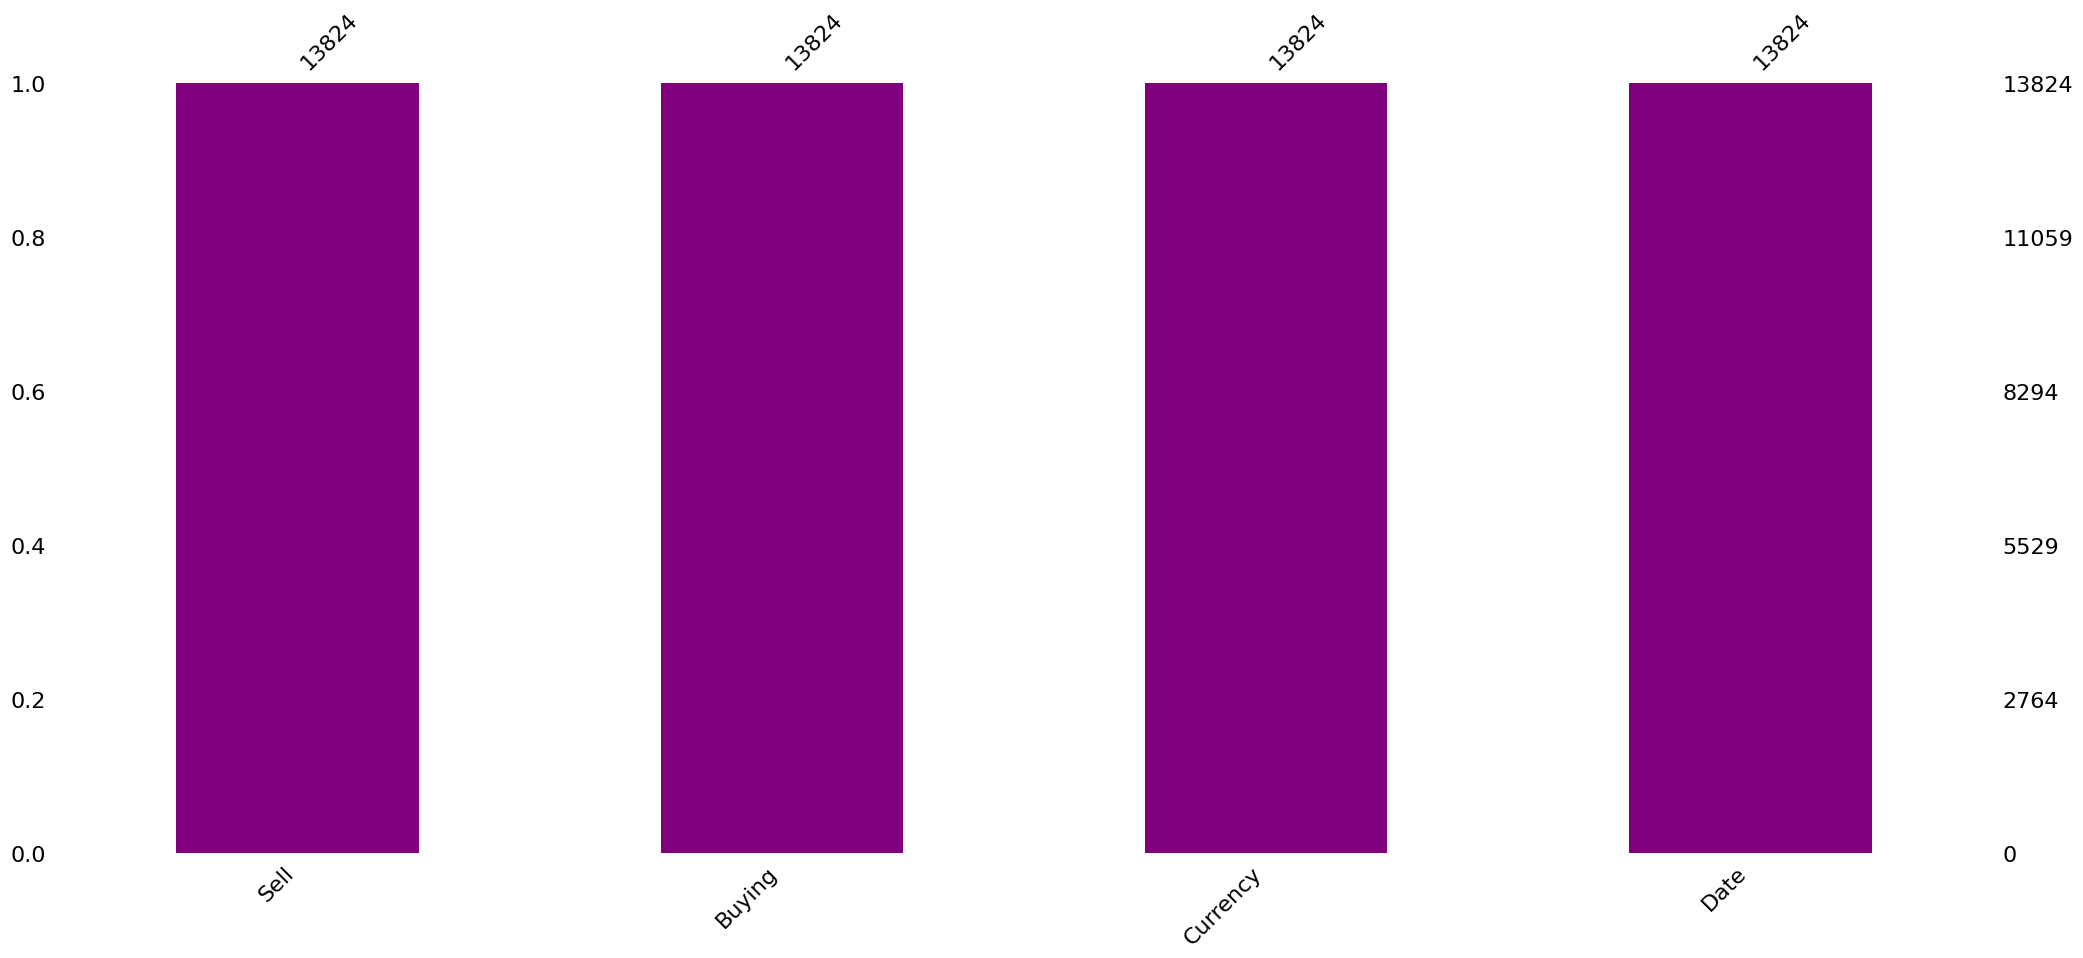

In [ ]:
#The barplot provides a simple plot where each bar represents a column within the dataframe.
#The height of the bar indicates how complete that column is, i.e, how many non-null values are present.
#It can be generated by calling upon:

missno.bar(My__Data , color='purple') # nan value not exist


# Working with Data Types

In [ ]:
My__Data.dtypes

Sell        float64
Buying      float64
Currency     object
Date         object
dtype: object

# Data Analysis with Explanation

In [ ]:
My__Data["Currency"].unique()


array(['JPY', 'British_pound', 'AED', 'American_dollar',
       'Australian_dollar', 'Canadian_dollar', 'Jordanian_dinar',
       'Bahrain_dinar', 'Kuwaiti_dinar', 'Saudi_riyals', 'OMR',
       'Qatari_riyal', 'Swiss_Franc', 'Danish_krone', 'Swedish_kronor',
       'Norwegian_krone', 'CNY', 'euro'], dtype=object)

In [ ]:
My__Data["Currency"].value_counts()


JPY                  768
British_pound        768
CNY                  768
Norwegian_krone      768
Swedish_kronor       768
Danish_krone         768
Swiss_Franc          768
Qatari_riyal         768
OMR                  768
Saudi_riyals         768
Kuwaiti_dinar        768
Bahrain_dinar        768
Jordanian_dinar      768
Canadian_dollar      768
Australian_dollar    768
American_dollar      768
AED                  768
euro                 768
Name: Currency, dtype: int64

In [ ]:
fig = px.histogram(My__Data , x= "Currency" , text_auto=True)
fig.update_layout(bargap=0.5)
fig.show()


In [ ]:
describe_sell = pd.DataFrame(My__Data["Sell"].describe()).reset_index()
describe_sell


,index,Sell
0,count,13824.000000
1,mean,17.666738
2,std,17.021752
3,min,1.345900
4,25%,4.221350
5,50%,14.347300
6,75%,22.256800
7,max,100.125600


In [ ]:
fig = px.bar(describe_sell, x =describe_sell["index"][1 : ]  , y=describe_sell["Sell"][1 : ] )
fig.show()


Create a list of unique currencies from the "Currency" column of the my_data dataframe. Create an empty list to store dataframes for each currency. For each currency, filter the my_data dataframe to include only rows where the currency matches the current currency in the loop. Then, select the 10 smallest values of the "Buying" column for that currency. From the resulting dataframe, select only the "Buying", "Currency", and "Date" columns. Append the resulting dataframe to the list created in step 2. Combine all dataframes in the list into one dataframe using pd.concat. Create a bar chart using the px.bar function from the Plotly Express library, where the x-axis shows the currency, the y-axis shows the "Buying" column, and the color of the bars corresponds to the currency. The text_auto parameter is used to display the values on the bars, and the hover_data parameter is used to display the date in the hover tooltip. Finally, the chart is displayed using the show() method.



# Sell Column


In [ ]:
# 10 smallest for the column of sell

currency_list = My__Data["Currency"].unique()
df_list = []
for i in currency_list:
    top_10 = My__Data[My__Data["Currency"] == i].nsmallest(10, "Sell")
    top_10 = top_10[["Sell", "Currency", "Date"]]
    df_list.append(top_10)

df = pd.concat(df_list , ignore_index=True)
fig = px.bar(df, x="Currency", y="Sell", color="Currency" , text_auto='.2s'  , hover_data=["Date"]  ,
             title="Top 10 smallest Currencies by Buying Value")
fig.show()


In [ ]:
# 10 largest of all currency for the column of sell

currency_list = My__Data["Currency"].unique()
df_list = []
for i in currency_list:
    top_10 = My__Data[My__Data["Currency"] == i].nsmallest(10, "Sell")
    top_10 = top_10[["Sell", "Currency", "Date"]]
    df_list.append(top_10)

df = pd.concat(df_list , ignore_index=True)
fig = px.bar(df, x="Currency", y="Sell", color="Currency" , text_auto='.2s'  , hover_data=["Date"] ,
             title="Top 10 Currencies by Buying Value")
fig.show()


# Buying column

In [ ]:
My__Data[["Buying" , "Currency" , "Date"]][My__Data["Buying"] == My__Data["Buying"].max()]


,Buying,Currency,Date
6151,99.7619,Kuwaiti_dinar,2/14/2023


In [ ]:
My__Data[["Buying" , "Currency" , "Date"]][My__Data["Buying"] == My__Data["Buying"].min()]


,Buying,Currency,Date
12233,1.3344,Norwegian_krone,3/22/2020


In [ ]:
fig = px.box(My__Data,  y="Buying"  , title="Box plot of Buying column in My_Data dataframe")
fig.show()


In [ ]:
fig = px.box(My__Data, x= "Currency" , y="Buying" , title="Box Plot of Buying Prices by Currency" )
fig.show()



In [71]:
fig = px.line(My__Data, x='Currency', y="Buying"   )
fig.show()


In [ ]:
fig = px.violin(My__Data, y="Buying")
fig.show()


In [66]:
fig = px.scatter(My__Data , x="Sell" , y="Buying" , color="Currency" ,
                 title="Scatter Plot of Selling vs. Buying Prices by Currency")
fig.show()


In [68]:
# sum of the sell column of all currency

list = My__Data["Currency"].unique()
j = 0
df = pd.DataFrame(columns=["currency" , "sum"])
for i in list :
    df.loc[j] = [ i , My__Data["Sell"][My__Data["Currency"] == i].sum() ]
    j = j+1


In [69]:
df

,currency,sum
0,JPY,11532.8922
1,British_pound,17381.1349
2,AED,3679.0895
3,American_dollar,13512.3736
4,Australian_dollar,9581.0425
5,Canadian_dollar,10378.7978
6,Jordanian_dinar,19078.2877
7,Bahrain_dinar,35845.3822
8,Kuwaiti_dinar,44315.4650
9,Saudi_riyals,3600.5468


In [70]:
fig = px.pie(df, values="sum", names='currency' )
fig.show()


# KMeans model

In [72]:
X = My__Data[["Sell" , "Buying"]]
Y = np.random.random((13824))

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.3 , random_state=42 , shuffle=True)


In [73]:
print(x_train.shape)
x_test.shape


(9676, 2)


(4148, 2)

In [74]:
cs = []
n = 5
for i in range(2,10) :
    kmeans = KMeans(n_clusters = i )
    kmeans = kmeans.fit(x_train)
    cs.append(kmeans.inertia_)
    print(f"the n_clusters is {i} and score is {silhouette_score(x_train , kmeans.labels_)}  ")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



the n_clusters is 2 and score is 0.7405267635433264  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



the n_clusters is 3 and score is 0.7236301515268568  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



the n_clusters is 4 and score is 0.7305834637047612  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



the n_clusters is 5 and score is 0.7017314278179566  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



the n_clusters is 6 and score is 0.7145015003747198  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



the n_clusters is 7 and score is 0.730037094104964  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



the n_clusters is 8 and score is 0.7095775249262959  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



the n_clusters is 9 and score is 0.7132912195026955  


In [75]:
fig = px.line(x=range(2 , 10) , y = cs , title="Elbow")
fig.show()


In [76]:
# K-means clustering

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [77]:
x_test = x_test.to_numpy()
y_pred = kmeans.fit_predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [78]:
# Scatter plot of predicted cluster labels with centroids.

fig = go.Figure([
    go.Scatter(x=x_test[np.squeeze(y_pred == 0), 0], y=x_test[np.squeeze(y_pred == 0), 1], mode='markers', marker=dict(size=10)),
    go.Scatter(x=x_test[np.squeeze(y_pred == 1), 0], y=x_test[np.squeeze(y_pred == 1), 1], mode='markers', marker=dict(size=10)),
    go.Scatter(x=x_test[np.squeeze(y_pred == 2), 0], y=x_test[np.squeeze(y_pred == 2), 1], mode='markers', marker=dict(size=10)),
    go.Scatter(x=x_test[np.squeeze(y_pred == 3), 0], y=x_test[np.squeeze(y_pred == 3), 1], mode='markers', marker=dict(size=10)),

    go.Scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers', marker=dict(size=20))
])
fig.show()
